In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("creditcard.csv")
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [43]:
# Assuming your dataset is a pandas DataFrame
# And you want to keep only 'Time' and 'Class' columns

# Method 1: Using drop with inplace=True
columns_to_keep = ['Time', 'Class']
columns_to_drop = [col for col in dataset.columns if col not in columns_to_keep]
dataset.drop(columns=columns_to_drop, inplace=True)

# Method 2: Alternative approach using only the columns you want to keep
# dataset = dataset[['Time', 'Class']]  # This creates a new DataFrame

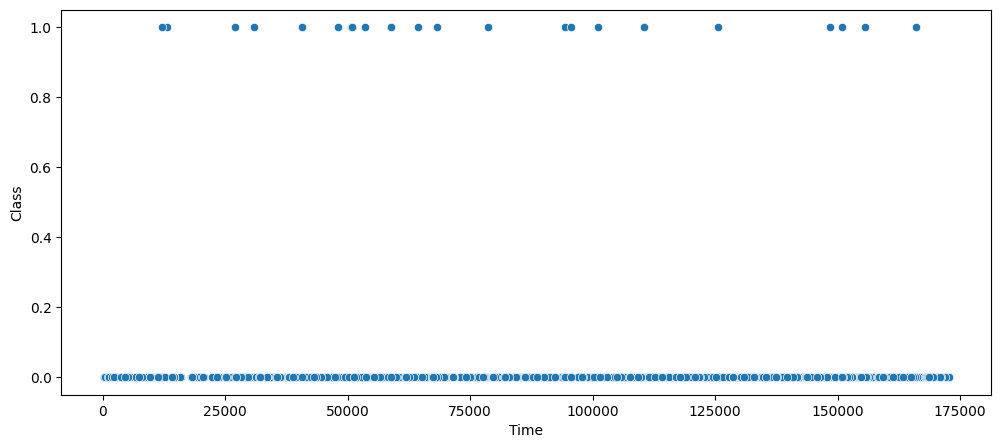

In [45]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Time", y="Class", data=dataset)
plt.show()

In [46]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="V1", y="Class", data=dataset)
plt.show()

ValueError: Could not interpret value `V1` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x500 with 0 Axes>

In [47]:
x = dataset[["Time"]]
y = dataset[["Class"]]


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [52]:
lr.score(x_test, y_test)*100

99.25

In [53]:
lr.predict_proba([[171524]])

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99193622, 0.00806378]])

ValueError: Per-column arrays must each be 1-dimensional

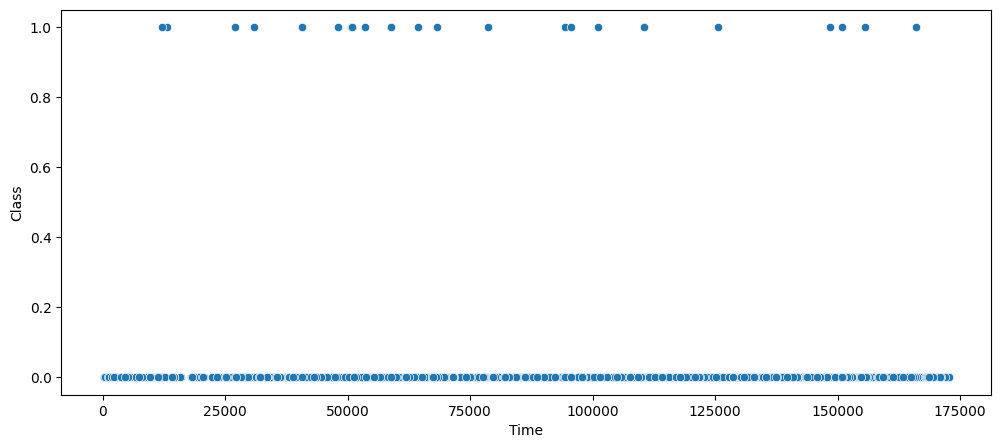

In [54]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Time", y="Class", data=dataset)
#sns.lineplot(x = "Time", y = lr.predict(x), data=dataset, color="red")
sns.scatterplot(x = "Time", y = lr.predict_proba(x), data=dataset, color="red")
plt.show()

In [55]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="V1", y="Class", data=dataset)
#sns.lineplot(x = "Time", y = lr.predict(x), data=dataset, color="red")
sns.scatterplot(x = "V1", y = lr.predict_proba(x), data=dataset, color="red")
plt.show()

ValueError: Could not interpret value `V1` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x500 with 0 Axes>

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


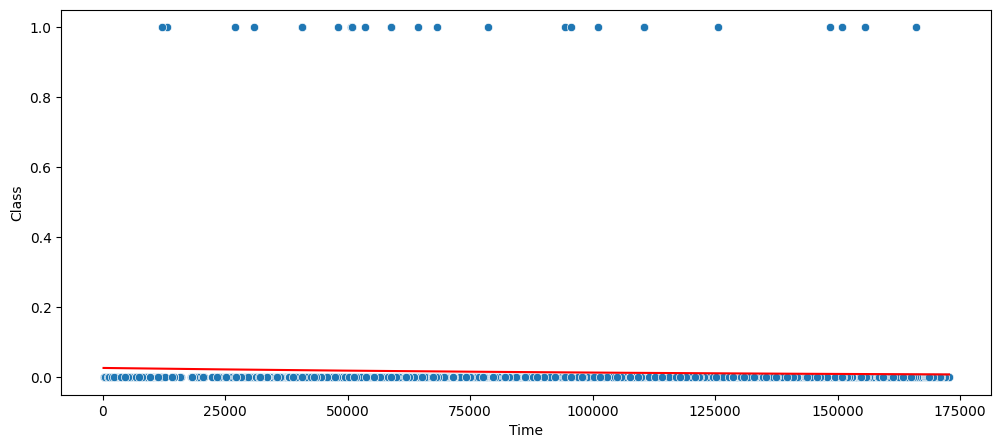

In [56]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Time", y="Class", data=dataset)

# Extract the feature column for prediction
X = dataset[["Time"]].values  # Make sure to use a 2D array for the model

# For binary classification, get the probability of the positive class (class 1)
# The second column [[:,1]] of predict_proba contains probabilities for class 1
predictions = lr.predict_proba(X)[:,1]  # Get probabilities for positive class

# Create a scatter plot with the original x values and predicted probabilities
sns.lineplot(x=dataset["Time"], y=predictions, color="red")

plt.show()

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


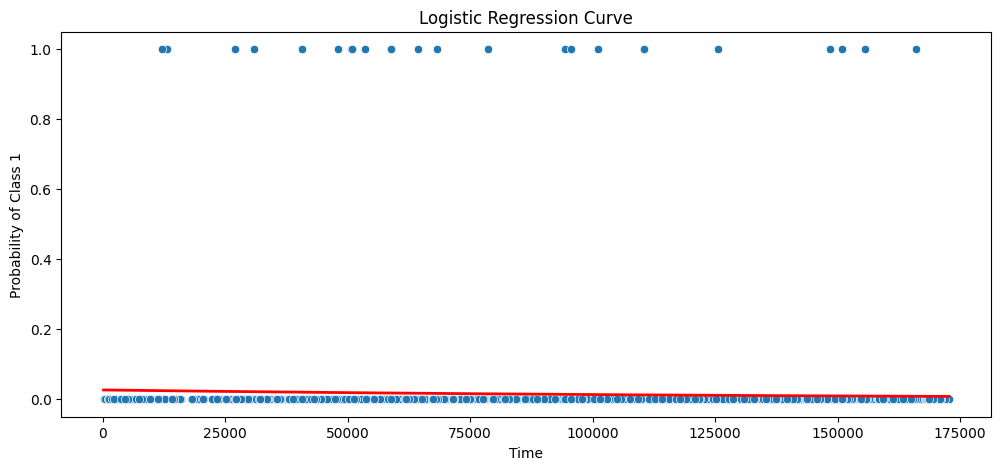

In [57]:
plt.figure(figsize=(12,5))
# Plot the original data points
sns.scatterplot(x="Time", y="Class", data=dataset)

# Create a range of evenly spaced points for a smooth curve
# This gives us more points to better visualize the S-shape
import numpy as np
x_range = np.linspace(dataset["Time"].min(), dataset["Time"].max(), 300).reshape(-1, 1)

# Get predictions for these points
y_pred = lr.predict_proba(x_range)[:, 1]  # Probability for class 1

# Plot the logistic regression curve
# Using lineplot with sorted values to ensure proper curve visualization
plt.plot(x_range, y_pred, color="red", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Probability of Class 1")
plt.title("Logistic Regression Curve")
plt.show()